In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Função de limpeza
def clean_data(df):
    # 1. Remover colunas completamente vazias
    df = df.dropna(axis=1, how='all')
    
    # 2. Remover linhas totalmente vazias
    df = df.dropna(axis=0, how='all')
    
    # 3. Preencher valores numéricos faltantes com mediana
    num_cols = df.select_dtypes(include=['float64','int64']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # 4. Preencher valores categóricos faltantes com o valor mais frequente
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    # 5. Remover outliers pelo método IQR
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        df = df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]
        
    # 6. Remover duplicados
    df = df.drop_duplicates()

    # 7. Ajustar tipos (consistência)
    df = df.convert_dtypes()

    return df


In [ ]:
# Carregar bases
zona1 = pd.read_csv("Z1_CAJICA_ambient-weather-20250604-20251104.csv")
zona2 = pd.read_csv("Z2_GIRALDA_ambient-weather-20250604-20251104.csv")
zona3 = pd.read_csv("Z3_OIKOS_ambient-weather-20250604-20251104.csv")


In [ ]:
# Limpeza
zona1_clean = clean_data(zona1)
zona2_clean = clean_data(zona2)
zona3_clean = clean_data(zona3)


In [ ]:
# Salvar resultado
zona1_clean.to_csv("zona1_clean.csv", index=False)
zona2_clean.to_csv("zona2_clean.csv", index=False)
zona3_clean.to_csv("zona3_clean.csv", index=False)

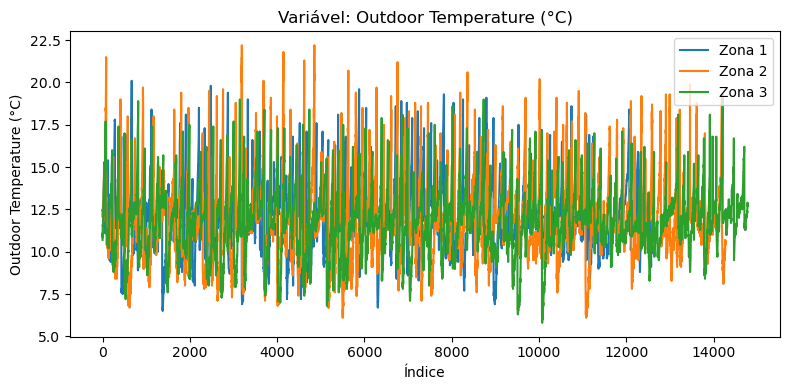

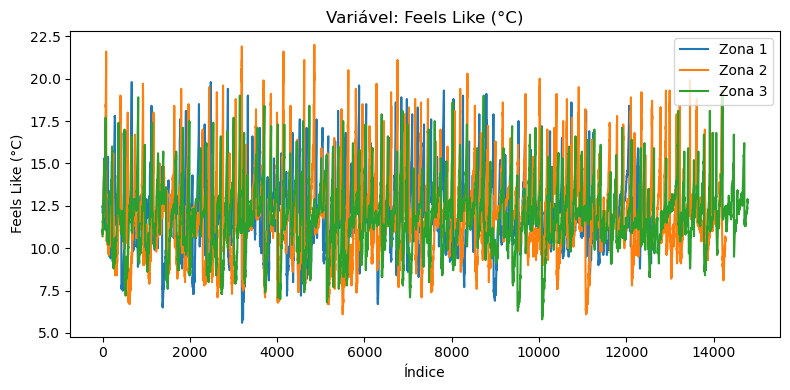

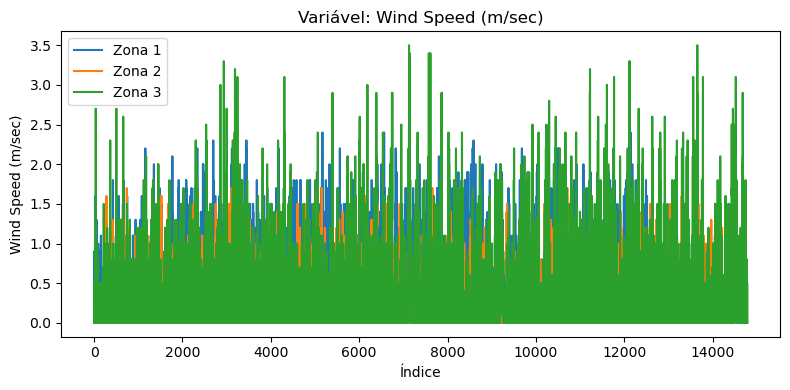

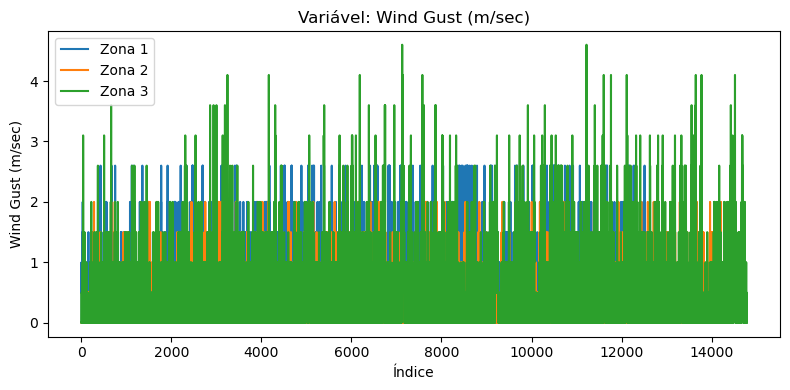

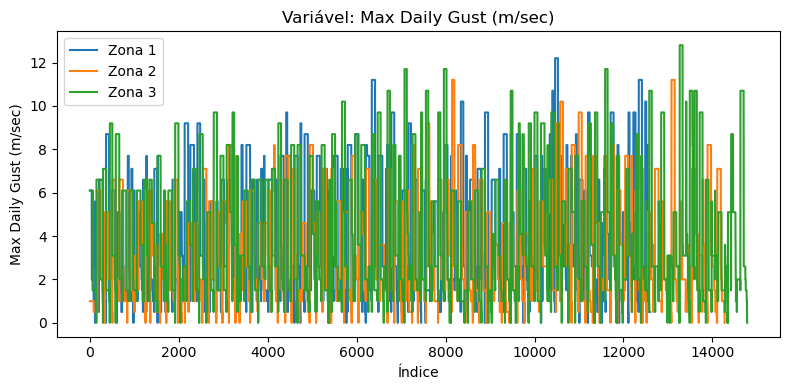

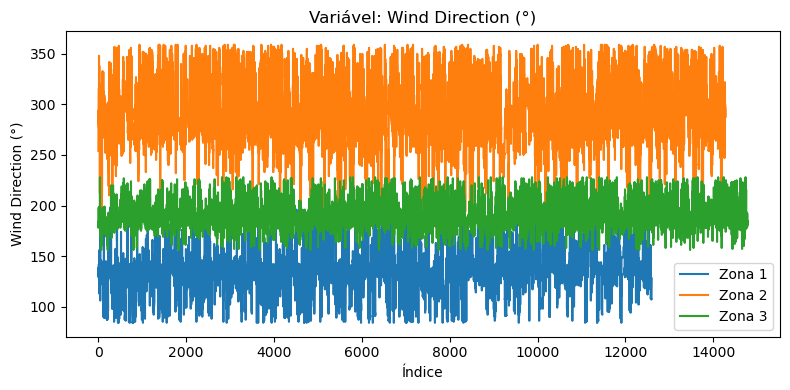

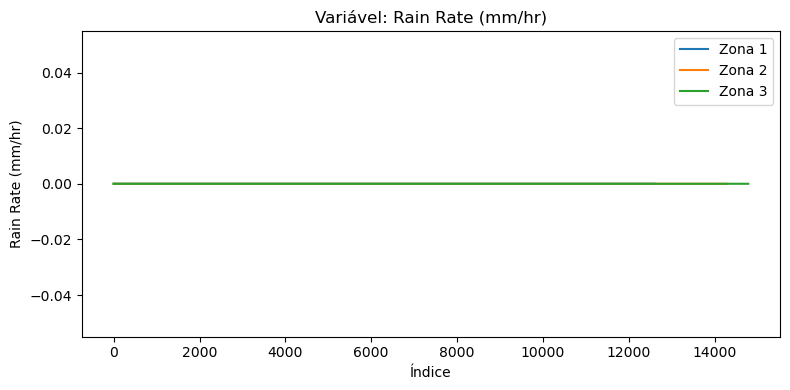

KeyError: 'Event Rain (mm)'

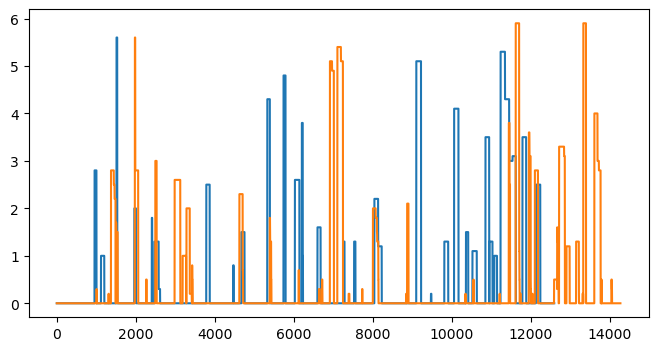

In [ ]:
num_cols = zona1_clean.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    plt.plot(zona1_clean[col].values, label='Zona 1')
    plt.plot(zona2_clean[col].values, label='Zona 2')
    plt.plot(zona3_clean[col].values, label='Zona 3')
    plt.title(f"Variável: {col}")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Arquivo da zona 3 não tem Event Rain (mm), por isso o erro